# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [83]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data_df = pd.merge(mouse_metadata,study_results, how="outer", on="Mouse ID")

# Display the data table for preview
combined_data_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [ ]:
# Checking the number of mice.
total_mice = len(combined_data_df["Mouse ID"])
total_mice


In [84]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dupe_mice = combined_data_df[combined_data_df.duplicated(["Mouse ID","Timepoint"])]
dupe_mice


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [85]:
# Optional: Get all the data for the duplicate mouse ID. 
all_dupe_mice = combined_data_df[combined_data_df.duplicated(["Mouse ID"])]
all_dupe_mice


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [ ]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_data_df.drop_duplicates(subset = ["Mouse ID"])
clean_df

In [86]:
# Checking the number of mice in the clean DataFrame.
clean_df_len = len(clean_df["Mouse ID"])
clean_df_len

249

## Summary Statistics

In [87]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

sum_mean = combined_data_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
sum_median = combined_data_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
sum_var = combined_data_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
sum_std = combined_data_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sum_sem = combined_data_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()



In [88]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.

summary_df = pd.DataFrame({"Tumor Volume Mean": sum_mean,
                          "Tumor Volume Median": sum_median,
                          "Tumor Volume Variance": sum_var,
                          "Tumor Volume Standard Deviation": sum_std,
                          "Tumor Volume SEM": sum_sem
                          })
summary_df

,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0.5, 1.0, 'Number of Timepoints per Treatment')

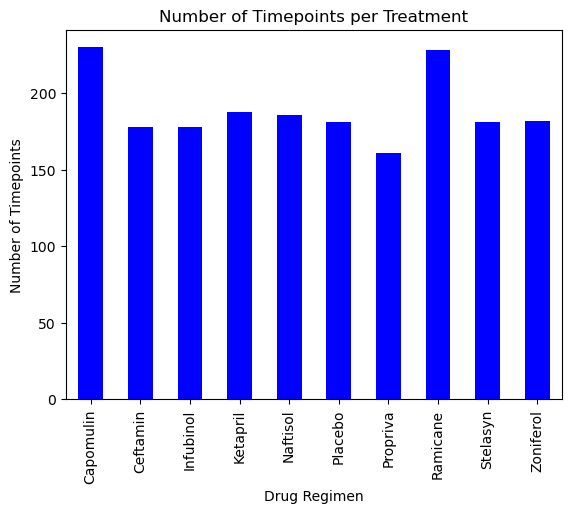

In [89]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
bar_plot = combined_data_df.groupby("Drug Regimen")["Timepoint"].count().plot(kind = "bar", color = "blue")
bar_plot

bar_plot.set_ylabel("Number of Timepoints")
bar_plot.set_title("Number of Timepoints per Treatment")


Text(0, 0.5, 'Number of Timepoints')

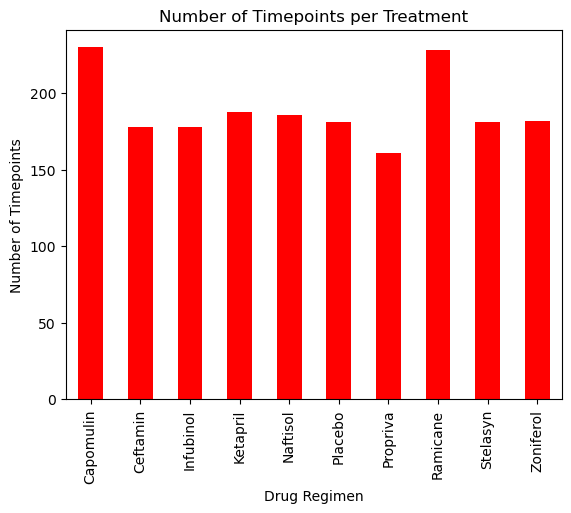

In [90]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
drug_type = combined_data_df.groupby("Drug Regimen")

timepoint_count = drug_type["Timepoint"].count()

bar_pyplot = timepoint_count.plot(kind="bar", title="Number of Timepoints per Treatment", color="red")
bar_pyplot.set_ylabel("Number of Timepoints")

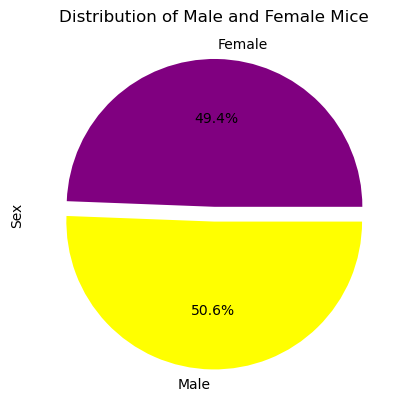

In [91]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
colors = ["purple","yellow"]
explode = (0.05,0.05)

gender_pie_plot = combined_data_df.groupby("Sex")['Sex'].count()

pie= gender_pie_plot.plot(kind='pie', y='Mouse ID', autopct='%1.1f%%', explode=explode, colors=colors, title="Distribution of Male and Female Mice")

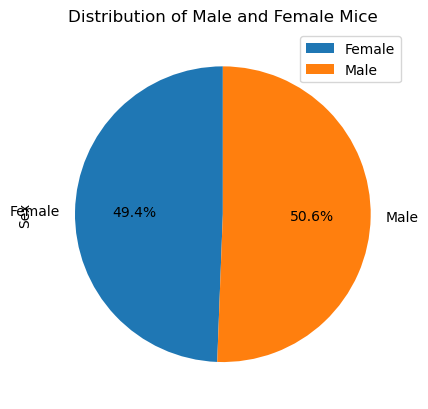

In [92]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_counts = combined_data_df.groupby("Sex")['Sex'].count()
gender_counts.plot(kind="pie", autopct='%1.1f%%', startangle=90)
plt.title("Distribution of Male and Female Mice")
plt.legend()
plt.show()


## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.



## Line and Scatter Plots

Text(0.5, 1.0, 'Mouse treated with Capomulin')

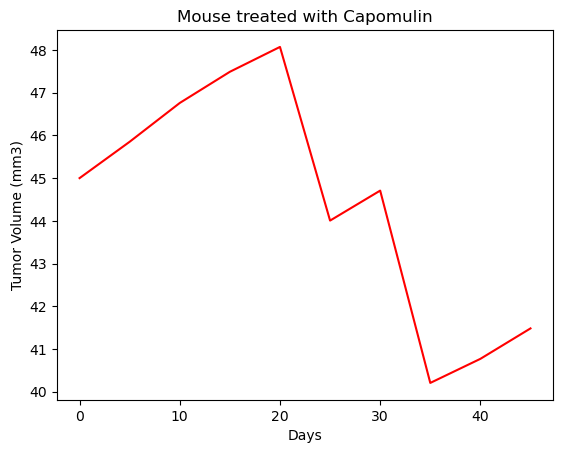

In [93]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
line_plot = combined_data_df.loc[combined_data_df["Mouse ID"]=="l509"]
plt.plot(line_plot["Timepoint"],line_plot["Tumor Volume (mm3)"], color="red")

plt.xlabel("Days")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Mouse treated with Capomulin")


Text(0.5, 1.0, 'Mouse Weight vs Average Tumor Volume')

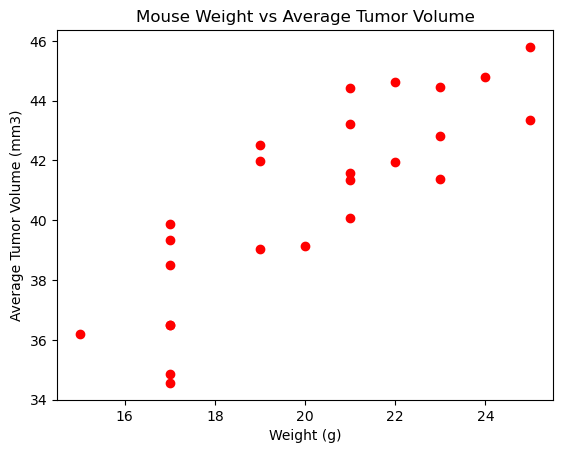

In [94]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
scatter_plot_df = combined_data_df.loc[combined_data_df["Drug Regimen"]=="Capomulin"]
average_tumor_volume = pd.DataFrame(scatter_plot_df.groupby("Mouse ID")["Tumor Volume (mm3)"].mean())
#print(average_tumor_volume)
mouse_weight = combined_data_df.loc[combined_data_df["Drug Regimen"]=="Capomulin"]
#print(mouse_weight)

scatter = pd.merge(average_tumor_volume,mouse_weight, on="Mouse ID")

#print (scatter)
scatter_plot = scatter[["Weight (g)", "Tumor Volume (mm3)_x"]].drop_duplicates()

#plot
x_axis = scatter_plot["Weight (g)"]
y_axis = scatter_plot["Tumor Volume (mm3)_x"]
plt.scatter(x_axis,y_axis, color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Mouse Weight vs Average Tumor Volume")

## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

